# *Часть 1 - выгрузка текста*

In [ ]:
import requests
from bs4 import BeautifulSoup
import json

In [ ]:
my_text=[]
page=5000
i=0
while i<=1500:
  page0=requests.get('http://zpp.rospotrebnadzor.ru/Forum/Appeals/Details/{}'.format(page))
  soup=BeautifulSoup(page0.content, 'html.parser')
  t=soup.find('p', class_='appeal-details-message')
  if t != None:
    my_text.append(t.get_text())
    i = i+1
  page=page+1

In [ ]:
my_text

['Здравствуйте!\r\nСуть проблемы: я заключила договор на обучение со школой английского языка SpeakU 11 сентября 2017г.\r\nСейчас хочу этот договор расторгнуть. Днем 11 января 2018г. я позвонила по этому вопросу консультанту по работе с клиентами SpeakU Олесе Новиковой, попросив предоставить мне выписку для банка с необходимыми расчетами для закрытия кредита (т.к. был заключен кредитный договор с Альфа-банком) и получила ответ, что она об этом ничего не знает и делать этого не умеет, а объяснит мне все только директор и только 22 января (в результате чего мне придется платить за дополнительный месяц, в течение которого я обучаться не буду, т.к. уже пройдет дата обязательного платежа по кредиту). Кроме того мне пригрозили штрафными санкциями и бросили трубку, заявив, что я могу обращаться хоть в суд.\r\nКак итог, я вижу 3 проблемы:\r\n- непредоставление информации (нарушение прав) и некомпетентность специалиста;\r\n- необходимость переплаты за услуги, которыми не пользуются;\r\n- неправ

In [ ]:
with open('my_text.txt', 'w') as f:
   f.write(json.dumps(my_text))

In [ ]:
with open('my_text.txt', 'r') as f:
  my_text = json.loads(f.read())

# *Часть 2 - предобработка текста*

### *Регулярные выражения*

In [ ]:
import re

In [ ]:
complaints=my_text.copy()

In [ ]:
for i in range (len (complaints)):
  complaints[i] = re.sub("[a-zA-Z]+", "", complaints[i]) #удаляем все английские слова
  complaints[i]=re.sub(r'\w*\d\w*', '', complaints[i]).strip() #удаляем числа
  complaints[i]=re.sub(r'[^\w\s]', '', complaints[i]) #удаляем пунктуацию
  complaints[i]=re.sub(r'\n', '', complaints[i]) #удаляем разрыв строки  
  complaints[i]=re.sub(r' +', ' ', complaints[i]) #удаляем лишние пробелы   

### *Preprocessing*

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
from string import punctuation

In [ ]:
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer(lang='ru')

In [ ]:
!pip install autocorrect
from autocorrect import Speller
spell = Speller(lang='ru')

In [ ]:
from autocorrect import Speller

In [ ]:
from gensim import corpora
from gensim import models

In [ ]:
#tokinize
text = [word_tokenize(document) for document in complaints]

In [ ]:
print (text[0])

['Здравствуйте', 'Суть', 'проблемы', 'я', 'заключила', 'договор', 'на', 'обучение', 'со', 'школой', 'английского', 'языка', 'сентября', 'Сейчас', 'хочу', 'этот', 'договор', 'расторгнуть', 'Днем', 'января', 'я', 'позвонила', 'по', 'этому', 'вопросу', 'консультанту', 'по', 'работе', 'с', 'клиентами', 'Олесе', 'Новиковой', 'попросив', 'предоставить', 'мне', 'выписку', 'для', 'банка', 'с', 'необходимыми', 'расчетами', 'для', 'закрытия', 'кредита', 'тк', 'был', 'заключен', 'кредитный', 'договор', 'с', 'Альфабанком', 'и', 'получила', 'ответ', 'что', 'она', 'об', 'этом', 'ничего', 'не', 'знает', 'и', 'делать', 'этого', 'не', 'умеет', 'а', 'объяснит', 'мне', 'все', 'только', 'директор', 'и', 'только', 'января', 'в', 'результате', 'чего', 'мне', 'придется', 'платить', 'за', 'дополнительный', 'месяц', 'в', 'течение', 'которого', 'я', 'обучаться', 'не', 'буду', 'тк', 'уже', 'пройдет', 'дата', 'обязательного', 'платежа', 'по', 'кредиту', 'Кроме', 'того', 'мне', 'пригрозили', 'штрафными', 'санкциям

In [ ]:
#удалим пробелы 
text = [
     [token.strip().lower() for token in document]
     for document in text]

In [ ]:
#удалим стоп-слова
stopwords = set(stopwords.words('russian'))
stopwords_text = [
     [word for word in document if word not in stopwords]
     for document in text
 ]

In [ ]:
print(stopwords_text[0])

['здравствуйте', 'суть', 'проблемы', 'заключила', 'договор', 'обучение', 'школой', 'английского', 'языка', 'сентября', 'хочу', 'договор', 'расторгнуть', 'днем', 'января', 'позвонила', 'этому', 'вопросу', 'консультанту', 'работе', 'клиентами', 'олесе', 'новиковой', 'попросив', 'предоставить', 'выписку', 'банка', 'необходимыми', 'расчетами', 'закрытия', 'кредита', 'тк', 'заключен', 'кредитный', 'договор', 'альфабанком', 'получила', 'ответ', 'знает', 'делать', 'умеет', 'объяснит', 'директор', 'января', 'результате', 'придется', 'платить', 'дополнительный', 'месяц', 'течение', 'которого', 'обучаться', 'буду', 'тк', 'пройдет', 'дата', 'обязательного', 'платежа', 'кредиту', 'кроме', 'пригрозили', 'штрафными', 'санкциями', 'бросили', 'трубку', 'заявив', 'могу', 'обращаться', 'суд', 'итог', 'вижу', 'проблемы', 'непредоставление', 'информации', 'нарушение', 'прав', 'некомпетентность', 'специалиста', 'необходимость', 'переплаты', 'услуги', 'которыми', 'пользуются', 'неправильное', 'обращение', '

In [ ]:
#еще раз дропнем пунктуацию
punctuation += '--'
punctuation += "..."
punctuation +="========================================================================"
punctuation += "''"
punctuation += "``"
punctuation += "wa"
punctuation_text = [
     [word for word in document if word not in punctuation]
     for document in stopwords_text
 ]

In [ ]:
print(punctuation_text[0])

['здравствуйте', 'суть', 'проблемы', 'заключила', 'договор', 'обучение', 'школой', 'английского', 'языка', 'сентября', 'хочу', 'договор', 'расторгнуть', 'днем', 'января', 'позвонила', 'этому', 'вопросу', 'консультанту', 'работе', 'клиентами', 'олесе', 'новиковой', 'попросив', 'предоставить', 'выписку', 'банка', 'необходимыми', 'расчетами', 'закрытия', 'кредита', 'тк', 'заключен', 'кредитный', 'договор', 'альфабанком', 'получила', 'ответ', 'знает', 'делать', 'умеет', 'объяснит', 'директор', 'января', 'результате', 'придется', 'платить', 'дополнительный', 'месяц', 'течение', 'которого', 'обучаться', 'буду', 'тк', 'пройдет', 'дата', 'обязательного', 'платежа', 'кредиту', 'кроме', 'пригрозили', 'штрафными', 'санкциями', 'бросили', 'трубку', 'заявив', 'могу', 'обращаться', 'суд', 'итог', 'вижу', 'проблемы', 'непредоставление', 'информации', 'нарушение', 'прав', 'некомпетентность', 'специалиста', 'необходимость', 'переплаты', 'услуги', 'которыми', 'пользуются', 'неправильное', 'обращение', '

In [ ]:
#лемматизация (используем pymorphy2 как более адаптивный к русскому языку)
ru_lemm = [[morph.parse(w)[0].normal_form for w in document]
           for document in punctuation_text]

In [ ]:
ru_lemm[0]

['здравствуйте',
 'быть',
 'проблема',
 'заключить',
 'договор',
 'обучение',
 'школа',
 'английский',
 'язык',
 'сентябрь',
 'хотеть',
 'договор',
 'расторгнуть',
 'день',
 'январь',
 'позвонить',
 'этот',
 'вопрос',
 'консультант',
 'работа',
 'клиент',
 'олес',
 'новиков',
 'попросить',
 'предоставить',
 'выписка',
 'банк',
 'необходимый',
 'расчёт',
 'закрытие',
 'кредит',
 'тк',
 'заключить',
 'кредитный',
 'договор',
 'альфабанк',
 'получить',
 'ответ',
 'знать',
 'делать',
 'уметь',
 'объяснить',
 'директор',
 'январь',
 'результат',
 'прийтись',
 'платить',
 'дополнительный',
 'месяц',
 'течение',
 'который',
 'обучаться',
 'быть',
 'тк',
 'пройти',
 'дата',
 'обязательный',
 'платёж',
 'кредит',
 'кроме',
 'пригрозить',
 'штрафной',
 'санкция',
 'бросить',
 'трубка',
 'заявить',
 'мочь',
 'обращаться',
 'суд',
 'итог',
 'видеть',
 'проблема',
 'непредоставление',
 'информация',
 'нарушение',
 'право',
 'некомпетентность',
 'специалист',
 'необходимость',
 'переплата',
 'услуга

После лемматизации не все слова получили правильную начальную форму, но в целом смысл сохранился (А еще имя Олеся преобразовалось как "олес":(( )

In [ ]:
#еще раз удаляем стоп слова
lem_text = [
     [word for word in document if word not in stopwords]
     for document in ru_lemm
 ]

In [ ]:
#удалим шаблонные слова и обращения, которые не помогают узнать суть текста, так же удалим мусорные слова
bad_words = ["Здравствуйте", "Добрый", "день", "вечер", "утро", "пожалуйста", "помогите", 'su', 'г', 'тк']
clean_text = [
     [word for word in document if word not in bad_words]
     for document in lem_text
 ]

In [ ]:
#автокоррекция
spell = Speller(lang='ru')
correct_text = [
                [spell(word) for word in document]
                for document in clean_text
]

In [ ]:
#создаем словарь 
dictionary = corpora.Dictionary(correct_text)

In [ ]:
#проводим векторизацию
corpus = [dictionary.doc2bow(text) for text in correct_text]

In [ ]:
#tf-idf model
tfidf_model = models.TfidfModel(corpus)  

In [ ]:
#tfidf 
tfidf = tfidf_model[corpus]

# *Часть 3 - тематическое моделирование*

Для тематического моделирования будем использовать LSI, т.к. в прошлой работе данный метод показал более осмысленные результаты

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import random

In [ ]:
#оптимальное количество топиков
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        random.seed(10)
        model = models.LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary) #train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
def plot_graph(dictionary, doc_term_matrix, texts, start, stop, step, model_list, coherence_values):
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [ ]:
start,stop,step=2,12,1
model_list, coherence_values = compute_coherence_values(dictionary = dictionary, doc_term_matrix = tfidf, doc_clean = correct_text, start = start, stop = stop, step = step)

0.34725465840852177
0.465554010310687
0.40304427022804806
0.4259285201252476
0.3658722295519485
0.3559809290296287
0.3859564332471744
0.34444672901847967
0.3628049785622189
0.36027959639240226


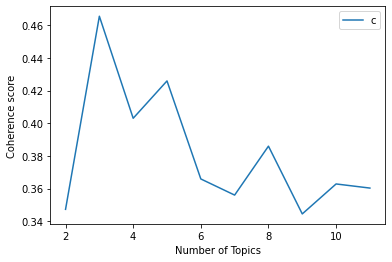

In [ ]:
plot_graph(dictionary, tfidf, correct_text, start, stop, step, model_list, coherence_values)

In [ ]:
index = coherence_values.index(max(coherence_values))
result = model_list[index].show_topics()
all_topics=[] #добавим в массив полученные топики
for i in range(len(result)):
  all_topics.append(result[i][1])
  print(result[i][1])

0.213*"товар" + 0.177*"магазин" + 0.153*"телефон" + 0.133*"возврат" + 0.128*"деньга" + 0.118*"вернуть" + 0.114*"продавец" + 0.114*"ремонт" + 0.109*"договор" + 0.103*"средство"
0.351*"товар" + 0.236*"магазин" + -0.214*"услуга" + -0.171*"договор" + 0.169*"продавец" + -0.142*"банк" + -0.138*"квартира" + 0.137*"возврат" + -0.128*"дом" + -0.122*"компания"
-0.424*"ремонт" + -0.234*"телефон" + 0.185*"товар" + -0.185*"сервисный" + -0.168*"центр" + 0.165*"заказ" + 0.160*"банк" + -0.148*"гарантийный" + 0.117*"договор" + -0.115*"смартфон"


In [ ]:
coeff = []
for i in range(len(result)):
  coeff_topic_num = list(map(float, re.findall(r"\d*\.\d+|\d+", result[i][1])))
  coeff.append(coeff_topic_num)

print(coeff)

[[0.213, 0.177, 0.153, 0.133, 0.128, 0.118, 0.114, 0.114, 0.109, 0.103], [0.351, 0.236, 0.214, 0.171, 0.169, 0.142, 0.138, 0.137, 0.128, 0.122], [0.424, 0.234, 0.185, 0.185, 0.168, 0.165, 0.16, 0.148, 0.117, 0.115]]


In [ ]:
topics = []
for i in range(len(result)):
  topics.append(re.findall(r"[А-Яа-я]+", result[i][1]))
print(topics)

[['товар', 'магазин', 'телефон', 'возврат', 'деньга', 'вернуть', 'продавец', 'ремонт', 'договор', 'средство'], ['товар', 'магазин', 'услуга', 'договор', 'продавец', 'банк', 'квартира', 'возврат', 'дом', 'компания'], ['ремонт', 'телефон', 'товар', 'сервисный', 'центр', 'заказ', 'банк', 'гарантийный', 'договор', 'смартфон']]


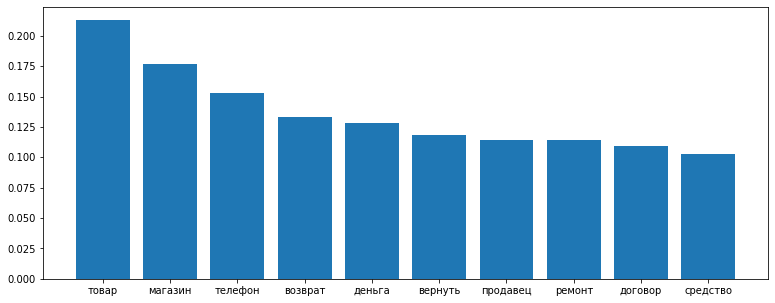

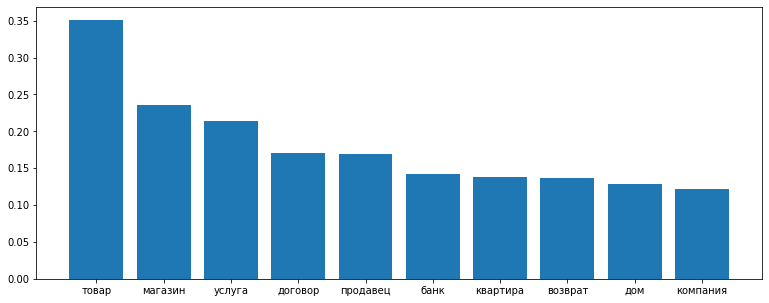

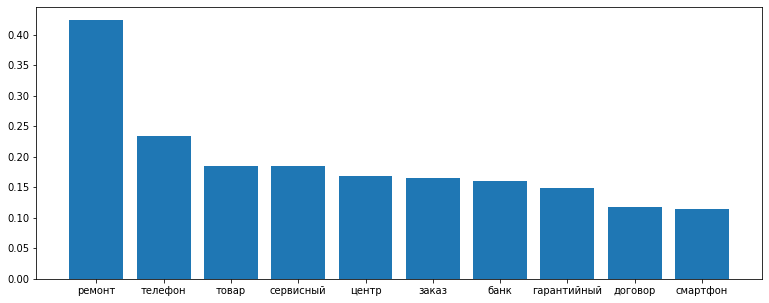

In [ ]:
#визуализируем темы с учетом полученных коэффициентов
for i in range(len(result)):
  fig, ax = plt.subplots(figsize=(13,5))
  ax.bar(topics[i], coeff[i])
  plt.show()  

Получено три топика, которые характеризуются 10 словами. Топики имеют схожий смысл, но в то же время нельзя сказать, что они одинаковые, т.к. в первом топике речь предположительно пойдет о возврате какого-либо товара, во втором случае проблема связана с неоказанием услуги, в третьем случае с ремонтом товара. 

# *Часть 4 - классификация*

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install pyLDAvis==2.1.2

In [ ]:
import pyLDAvis.gensim
import pyLDAvis
import gensim

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#сократим количество слов в каждом топике до трех 
topics = []
for i in range(len(result)):
  topics.append(re.findall(r"[А-Яа-я]+", result[i][1]))
topics = [sublist[:3] for sublist in topics]
print(topics)

[['товар', 'магазин', 'телефон'], ['товар', 'магазин', 'услуга'], ['ремонт', 'телефон', 'товар']]


In [ ]:
#сделаем лейблы
label_topics=['_'.join(i) for i in topics]

In [ ]:
#теперь создадим словарь и датафрэйм с топиком и его меткой
dict_topics = {'Topic': all_topics,'Label': label_topics}
t_l = pd.DataFrame(dict_topics, columns=['Topic','Label'])
t_l

,Topic,Label
0,"0.213*""товар"" + 0.177*""магазин"" + 0.153*""телеф...",товар_магазин_телефон
1,"0.351*""товар"" + 0.236*""магазин"" + -0.214*""услу...",товар_магазин_услуга
2,"-0.424*""ремонт"" + -0.234*""телефон"" + 0.185*""то...",ремонт_телефон_товар


In [ ]:
#добавим индексацию, чтобы потом применить для соединения
t_l['Index'] = t_l.index

In [ ]:
#создадим матрицу топик-документ
matrix= gensim.matutils.corpus2dense(model_list[index][tfidf], len(model_list[index].projection.s)).T / model_list[index].projection.s
#добавляем столбец с номером максимально вероятного топика
matrix= pd.DataFrame(abs(matrix))
matrix_new= matrix.join(pd.DataFrame(matrix.idxmax(axis=1), columns = ['Index']))

In [ ]:
#теперь нам нужна таблица с текстом документа и номером максимально вероятного топика
summary_table = pd.DataFrame(my_text, columns = ['Text'])
summary_table = summary_table.join(matrix_new)
summary_table["Numbering"] = np.arange(len(summary_table))

In [ ]:
#соединяем таблицу с текстом и таблицу с метками через индекс(нумерацию, которую задавали в начале)
summary_table = summary_table.merge(t_l, on='Index').set_index("Numbering").loc[np.arange(len(summary_table)), :]

In [ ]:
#По итогу оставлям таблицу с текстом жалобы, нашей меткой и номером топика
final_table = summary_table[['Text', 'Label', 'Index']]
final_table

,Text,Label,Index
Numbering,,,
0,Здравствуйте!\r\nСуть проблемы: я заключила до...,товар_магазин_услуга,1
1,"Добрый день. Приобрел квартиру в новостройке, ...",товар_магазин_услуга,1
2,Добрый день!по адресу г. Москва ул. Первомайск...,товар_магазин_телефон,0
3,"Был приобретён товар, заяц Аlilo G7 13.12.17, ...",товар_магазин_телефон,0
4,Здравствуйте. 20.12.2017 купила смартфон. 4.01...,товар_магазин_телефон,0
...,...,...,...
1496,"Плановое отключение воды в домах, обсуживаемых...",товар_магазин_услуга,1
1497,Добрый день. В магазине Леруа Мерлен Мытищи бы...,ремонт_телефон_товар,2
1498,Здравствуйте! В г. Нижний Новгород (также мне ...,товар_магазин_телефон,0


In [ ]:
#подготовим текст для классификации
text_for_model = []
for i in range(0, len(correct_text)):
  text_for_model.append(' '.join(correct_text[i]))

Переходим непосредственно к классификации. Используем градиентный бустинг, бэггинг и random forest, через метрики посмотрим какая модель сработала лучше на наших данных.

In [ ]:
#выделяем целевую переменную (y) и предикторы (x), разбиваем данные на тестовую и обучающую выборки
y = final_table['Label']
X = text_for_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
# boosting
modelGB = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=100)),
                     ])
modelGB.fit(X_train, y_train)
modelGB.score(X_train, y_train), modelGB.score(X_test, y_test)

(0.956, 0.6686626746506986)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
# bagging
modelBag = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', BaggingClassifier(KNeighborsClassifier())),
                     ])

modelBag.fit(X_train, y_train
modelBag.score(X_train, y_train), modelBag.score(X_test, y_test)

(0.736, 0.6187624750499002)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
# random forest
modelRF = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=100)),
                     ])
modelRF.fit(X_train, y_train)
modelRF.score(X_train, y_train), modelRF.score(X_test, y_test)

(1.0, 0.6946107784431138)

***ВЫВОД:***

Мы получили три оптимальных топика, несмотря на то, что сайт Роспотребнадзора имеет 11 категорий. Это может быть обусловлено тем, что скачанные данные не покрывают весь объем текста с сайта. Полученные топики имеют явное сходство между собой, но, если учесть все слова, которые содержит каждый топик, явно прослеживаются различные оттенки значений. 

По итогу работы 3 обученные модели показали примерно одинаковый результат. Можно сказать, что наихудшее качество показала модель 2 (BaggingClassifier), однако данная модель имеет наименьшее значение перепадов между обучающей  и тестовой выборками. У модели 3 (RandomForestClassifier) явно выражено переобучение и высокий перепад в значениях. Первая модель (GradientBoostingClassifier) является наиболее удачной, т.к. у нее высокий показатель качества, нет переобучения, хотя она также содержит перепад в значениях тестовой и обущающей выборки. 